In [1]:
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(1)

In [2]:
import os
import numpy as np
import pandas as pd
import shutil
import tensorflow as tf
from collections import deque
from matplotlib import pyplot

from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Input, BatchNormalization, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras.callbacks import Callback
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

from sklearn.utils import shuffle

In [3]:
from keras import backend as K

### Load data ###

In [4]:
df_acc_y = pd.read_csv('csv/df_acc_y.csv')
df_acc_x = pd.read_csv('csv/df_acc_x.csv')
df_acc_z = pd.read_csv('csv/df_acc_z.csv')
df_gyro_y = pd.read_csv('csv/df_gyro_y.csv')
df_gyro_x = pd.read_csv('csv/df_gyro_x.csv')
df_gyro_z = pd.read_csv('csv/df_gyro_z.csv')

In [5]:
df_acc_y.drop(columns=['Unnamed: 0'],inplace=True)
df_acc_x.drop(columns=['Unnamed: 0'],inplace=True)
df_acc_z.drop(columns=['Unnamed: 0'],inplace=True)
df_gyro_y.drop(columns=['Unnamed: 0'],inplace=True)
df_gyro_x.drop(columns=['Unnamed: 0'],inplace=True)
df_gyro_z.drop(columns=['Unnamed: 0'],inplace=True)

### Neural Network Model for Accelerometer data ###

In [6]:
#Legge til et lag til?
model_acc_y = Sequential()
model_acc_y.add(Dense(150, activation = 'relu', input_shape = (400,)))
model_acc_y.add(BatchNormalization())
model_acc_y.add(Dropout(rate = 0.25))
model_acc_y.add(Dense(1, activation = 'sigmoid'))
model_acc_y.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 150)               60150     
_________________________________________________________________
batch_normalization (BatchNo (None, 150)               600       
_________________________________________________________________
dropout (Dropout)            (None, 150)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 151       
Total params: 60,901
Trainable params: 60,601
Non-trainable params: 300
_________________________________________________________________


In [7]:
model_acc_x = Sequential()
model_acc_x.add(Dense(150, activation = 'relu', input_shape = (400,)))
model_acc_x.add(BatchNormalization())
model_acc_x.add(Dropout(rate = 0.25))
model_acc_x.add(Dense(1, activation = 'sigmoid'))

In [8]:
model_acc_z = Sequential()
model_acc_z.add(Dense(150, activation = 'relu', input_shape = (400,)))
model_acc_z.add(BatchNormalization())
model_acc_z.add(Dropout(rate = 0.25))
model_acc_z.add(Dense(1, activation = 'sigmoid'))

### Neural Network Model for Gyroscope data ###

Since the gyroscope has a different samplings rate, number of input nodes is different 

In [9]:
#Legge til et lag til?
model_gyro_y = Sequential()
model_gyro_y.add(Dense(150, activation = 'relu', input_shape = (200,)))
model_gyro_y.add(BatchNormalization())
model_gyro_y.add(Dropout(rate = 0.25))
model_gyro_y.add(Dense(1, activation = 'sigmoid'))
model_gyro_y.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 150)               30150     
_________________________________________________________________
batch_normalization_3 (Batch (None, 150)               600       
_________________________________________________________________
dropout_3 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 151       
Total params: 30,901
Trainable params: 30,601
Non-trainable params: 300
_________________________________________________________________


In [10]:
model_gyro_x = Sequential()
model_gyro_x.add(Dense(150, activation = 'relu', input_shape = (200,)))
model_gyro_x.add(BatchNormalization())
model_gyro_x.add(Dropout(rate = 0.25))
model_gyro_x.add(Dense(1, activation = 'sigmoid'))

In [11]:
model_gyro_z = Sequential()
model_gyro_z.add(Dense(150, activation = 'relu', input_shape = (200,)))
model_gyro_z.add(BatchNormalization())
model_gyro_z.add(Dropout(rate = 0.25))
model_gyro_z.add(Dense(1, activation = 'sigmoid'))

In [12]:
tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0.01, nesterov=False, name="SGD"
)

## ACC in y direction ###

In [13]:
model_acc_y.compile(loss = 'binary_crossentropy', optimizer = 'SGD', metrics = ['accuracy']) #"mean_squared_error"

In [14]:
df_acc_y

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,y
0,-9.715311,-5.055024,-0.736842,-8.055024,-0.234450,-9.050239,-2.889952,0.956938,-7.306220,-0.770335,...,13.461722,-31.617225,13.533493,-12.076555,-17.069378,15.976077,-20.236842,-6.270335,13.260766,0
1,-12.380383,9.260766,-18.057416,5.581340,7.363636,-26.889952,16.289474,-6.889952,-15.504785,12.492823,...,5.447368,-6.358852,6.700957,0.717703,9.464115,0.672249,-7.306220,31.045455,-9.779904,0
2,19.401914,4.770335,12.021531,-5.425837,16.167464,-29.241627,13.471292,31.933014,-48.110048,25.361244,...,-10.526316,-10.200957,8.188995,-0.076555,-0.382775,-8.801435,-6.846890,29.497608,-37.526316,0
3,8.088517,19.717703,-28.971292,28.253589,-21.868421,0.923445,4.574163,-9.552632,1.758373,0.794258,...,-55.421053,38.992823,12.315789,-59.827751,50.050239,-14.770335,-27.858852,34.227273,-23.751196,0
4,-0.363636,10.291866,-22.724880,12.255981,-9.578947,5.937799,-6.619617,-5.887560,11.870813,-24.117225,...,7.299043,3.442584,-9.674641,1.595694,3.160287,-4.834928,6.031100,-14.930622,19.968900,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,12.796651,-35.188995,27.870813,-2.727273,-2.413876,-2.387560,-2.552632,1.899522,-13.892344,12.485646,...,-25.177033,-20.619617,38.055024,-39.576555,3.239234,16.710526,-36.212919,17.923445,-4.210526,1
944,-10.703349,6.222488,-6.437799,-6.411483,12.045455,-17.416268,-2.294258,21.153110,-37.995215,30.672249,...,11.808612,-8.047847,2.404306,0.299043,-3.344498,2.421053,-3.342105,5.260766,3.964115,1
945,-5.868421,-6.090909,14.696172,-12.641148,2.184211,5.784689,-14.351675,6.138756,3.832536,-13.277512,...,-1.284689,-6.471292,1.260766,6.598086,-17.155502,23.332536,-14.846890,1.966507,-0.480861,1
946,7.227273,-5.373206,-0.765550,9.277512,-7.071770,-2.055024,6.533493,-0.160287,-19.141148,14.624402,...,27.454545,-42.937799,30.928230,-13.863636,-24.066986,40.021531,-36.887560,12.717703,13.394737,1


In [15]:
dataset = df_acc_y.values

In [16]:
X = dataset[:,0:400].astype(float)
Y = dataset[:,400].astype(int)

In [17]:
X, y = shuffle(X, Y, random_state=1)

In [18]:
X_train = X[:568]
y_train = y[:568]

In [19]:
X_val = X[568:758]
y_val = y[568:758]

In [20]:
X_test = X[758:]
y_test = y[758:]

In [21]:
X_train  = np.array(X_train)
y_train = np.array(y_train)
X_val  = np.array(X_val)
y_val = np.array(y_val)
X_test  = np.array(X_test)
y_test = np.array(y_test)

In [22]:
print("Train: ", X_train.shape, y_train.shape)
print("Val: ", X_val.shape, y_val.shape)
print("Test: ", X_test.shape, y_test.shape)

Train:  (568, 400) (568,)
Val:  (190, 400) (190,)
Test:  (190, 400) (190,)


Epoch 00206: early stopping
Train: 0.861, Validation: 0.553


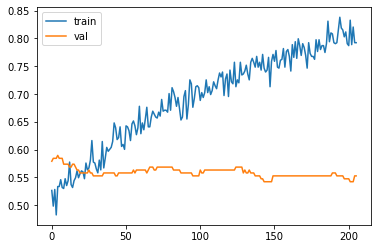

In [23]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('best_acc_y.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)
# fit model
history = model_acc_y.fit(X_train, y_train, batch_size =10000, validation_data=(X_val, y_val), epochs=1000, verbose=0, callbacks=[es, mc])
# evaluate the model
_, train_acc = model_acc_y.evaluate(X_train, y_train, verbose=0)
_, val_acc = model_acc_y.evaluate(X_val, y_val, verbose=0)
print('Train: %.3f, Validation: %.3f' % (train_acc, val_acc))

# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='val')
pyplot.legend()
pyplot.show()

In [24]:
# load the saved model
saved_model = load_model('best_acc_y.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(X_train, y_train, verbose=0)
_, test_acc = saved_model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.549, Test: 0.542


In [25]:
get_output = K.function([model_acc_y.layers[0].input],
                                  [model_acc_y.layers[3].output])
layer_output_acc_y = get_output([X_test])[0]

### ACC in x direction

In [26]:
model_acc_x.compile(loss = 'binary_crossentropy', optimizer = 'SGD', metrics = ['accuracy']) #"mean_squared_error"

In [27]:
df_acc_x

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,x
0,2.423445,0.033493,-1.660287,1.184211,-6.239234,3.732057,-3.626794,-2.337321,-0.425837,0.253589,...,-11.511962,11.368421,-8.593301,-2.657895,1.272727,-1.700957,-6.837321,9.224880,-4.760766,0
1,2.322967,-3.464115,-2.693780,6.258373,-13.076555,9.801435,-8.720096,-1.921053,10.442584,-15.267943,...,-10.794258,0.602871,-0.368421,-6.765550,4.157895,-7.294258,-0.454545,-1.291866,-4.093301,0
2,4.253589,-6.988038,6.267943,2.662679,53.923445,-26.442584,-22.497608,31.873206,-29.626794,18.904306,...,1.021531,-2.282297,-11.026316,1.593301,-7.705742,-3.102871,1.988038,-7.815789,-8.337321,0
3,1.421053,-10.968900,4.954545,-8.669856,-4.724880,-0.956938,-7.282297,-5.504785,1.129187,-18.794258,...,1.212919,16.404306,-18.466507,0.849282,18.193780,-25.753589,12.629187,-1.949761,-19.088517,0
4,15.416268,-16.763158,-3.098086,-2.035885,-12.468900,4.356459,-18.935407,-1.887560,2.844498,-28.578947,...,0.744019,6.873206,-12.985646,3.988038,9.380383,-13.564593,6.679426,-3.944976,0.361244,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,-0.801435,9.184211,-7.476077,7.117225,2.648325,-5.040670,7.581340,-5.270335,6.691388,1.026316,...,-3.358852,19.834928,-19.803828,12.535885,4.263158,-15.093301,19.311005,-15.236842,5.748804,1
944,2.485646,-7.019139,8.263158,-2.703349,-0.531100,0.313397,5.856459,-11.811005,12.956938,-3.930622,...,1.411483,-2.418660,4.782297,-3.538278,1.308612,0.071770,-1.913876,1.413876,-3.320574,1
945,5.992823,-6.954545,2.877990,-2.251196,-2.911483,-0.019139,-5.210526,-0.124402,-9.437799,4.519139,...,1.114833,0.897129,-1.677033,2.088517,2.311005,-1.921053,2.308612,-7.004785,12.997608,1
946,-10.741627,2.593301,4.255981,-4.909091,4.294258,-2.808612,0.988038,-6.605263,6.669856,-6.509569,...,2.255981,-0.136364,7.978469,-6.729665,11.877990,-5.897129,8.004785,2.849282,-9.311005,1


In [28]:
dataset = df_acc_x.values

In [29]:
X = dataset[:,0:400].astype(float)
Y = dataset[:,400].astype(int)

In [30]:
X, y = shuffle(X, Y, random_state=1)

In [31]:
X_train = X[:568]
y_train = y[:568]

In [32]:
X_val = X[568:758]
y_val = y[568:758]

In [33]:
X_test = X[758:]
y_test = y[758:]

In [34]:
X_train  = np.array(X_train)
y_train = np.array(y_train)
X_val  = np.array(X_val)
y_val = np.array(y_val)
X_test  = np.array(X_test)
y_test = np.array(y_test)

In [35]:
print("Train: ", X_train.shape, y_train.shape)
print("Val: ", X_val.shape, y_val.shape)
print("Test: ", X_test.shape, y_test.shape)

Train:  (568, 400) (568,)
Val:  (190, 400) (190,)
Test:  (190, 400) (190,)


Epoch 00267: early stopping
Train: 0.905, Validation: 0.568


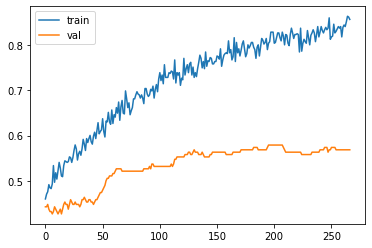

In [36]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('best_acc_x.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)
# fit model
history = model_acc_x.fit(X_train, y_train, batch_size =10000, validation_data=(X_val, y_val), epochs=1000, verbose=0, callbacks=[es, mc])
# evaluate the model
_, train_acc = model_acc_x.evaluate(X_train, y_train, verbose=0)
_, val_acc = model_acc_x.evaluate(X_val, y_val, verbose=0)
print('Train: %.3f, Validation: %.3f' % (train_acc, val_acc))

# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='val')
pyplot.legend()
pyplot.show()

In [37]:
# load the saved model
saved_model = load_model('best_acc_x.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(X_train, y_train, verbose=0)
_, test_acc = saved_model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.863, Test: 0.579


In [38]:
get_output = K.function([model_acc_x.layers[0].input],
                                  [model_acc_x.layers[3].output])
layer_output_acc_x = get_output([X_test])[0]

### ACC in z direction

In [39]:
model_acc_z.compile(loss = 'binary_crossentropy', optimizer = 'SGD', metrics = ['accuracy']) #"mean_squared_error"

In [40]:
df_acc_z

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,z
0,10.021531,3.724880,5.181818,8.677033,11.478469,4.842105,11.346890,13.937799,3.349282,-1.098086,...,21.186603,-11.674641,20.653110,-1.696172,-10.985646,24.638756,23.662679,-11.043062,5.000000,0
1,23.224880,15.133971,-12.605263,14.700957,17.770335,2.277512,13.959330,5.873206,1.059809,14.610048,...,6.255981,8.444976,2.540670,10.464115,10.282297,-2.126794,7.985646,3.263158,5.449761,0
2,-2.074163,2.208134,-4.569378,52.222488,35.366029,-44.818182,45.035885,11.662679,-10.779904,21.990431,...,17.693780,-5.856459,5.260766,7.837321,42.208134,-18.978469,-1.174641,44.849282,-29.732057,0
3,42.990431,-18.593301,10.744019,14.901914,13.944976,-1.339713,18.622010,-4.523923,16.478469,39.866029,...,-25.026316,58.296651,-54.629187,11.074163,29.107656,-9.320574,15.578947,8.787081,-0.846890,0
4,19.720096,22.507177,-6.332536,5.308612,2.882775,17.854067,-25.574163,47.009569,-0.564593,-10.241627,...,-12.236842,36.102871,20.973684,-15.566986,20.397129,24.610048,-13.251196,21.016746,0.394737,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,27.578947,16.124402,-6.200957,20.145933,2.083732,-4.667464,26.160287,17.944976,0.102871,-2.370813,...,6.856459,-10.693780,27.177033,1.102871,-0.660287,21.827751,11.617225,5.430622,9.595694,1
944,7.729665,16.844498,-2.177033,14.186603,32.002392,-5.165072,12.320574,17.717703,-11.961722,26.035885,...,6.248804,8.389952,10.861244,5.057416,6.827751,6.002392,5.502392,10.765550,31.708134,1
945,1.590909,-1.717703,11.136364,12.997608,12.653110,17.691388,-10.246411,8.138756,25.610048,10.078947,...,22.540670,-2.758373,29.210526,-2.839713,-2.705742,20.081340,25.358852,-5.346890,-1.997608,1
946,27.940191,10.748804,0.028708,21.363636,3.995215,-12.937799,34.882775,16.136364,-15.186603,19.246411,...,13.148325,-3.691388,26.047847,-0.255981,-7.662679,20.595694,-1.511962,-14.380383,12.990431,1


In [41]:
dataset = df_acc_z.values

In [42]:
X = dataset[:,0:400].astype(float)
Y = dataset[:,400].astype(int)

In [43]:
X, y = shuffle(X, Y, random_state=1)

In [44]:
X_train = X[:568]
y_train = y[:568]

In [45]:
X_val = X[568:758]
y_val = y[568:758]

In [46]:
X_test = X[758:]
y_test = y[758:]

In [47]:
X_train  = np.array(X_train)
y_train = np.array(y_train)
X_val  = np.array(X_val)
y_val = np.array(y_val)
X_test  = np.array(X_test)
y_test = np.array(y_test)

In [48]:
print("Train: ", X_train.shape, y_train.shape)
print("Val: ", X_val.shape, y_val.shape)
print("Test: ", X_test.shape, y_test.shape)

Train:  (568, 400) (568,)
Val:  (190, 400) (190,)
Test:  (190, 400) (190,)


Epoch 00166: early stopping
Train: 0.857, Validation: 0.484


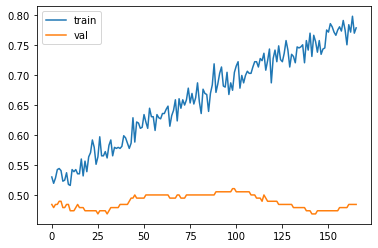

In [49]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('best_acc_z.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)
# fit model
history = model_acc_z.fit(X_train, y_train, batch_size =10000, validation_data=(X_val, y_val), epochs=1000, verbose=0, callbacks=[es, mc])
# evaluate the model
_, train_acc = model_acc_z.evaluate(X_train, y_train, verbose=0)
_, val_acc = model_acc_z.evaluate(X_val, y_val, verbose=0)
print('Train: %.3f, Validation: %.3f' % (train_acc, val_acc))

# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='val')
pyplot.legend()
pyplot.show()

In [50]:
# load the saved model
saved_model = load_model('best_acc_z.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(X_train, y_train, verbose=0)
_, test_acc = saved_model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.745, Test: 0.521


In [51]:
get_output = K.function([model_acc_z.layers[0].input],
                                  [model_acc_z.layers[3].output])
layer_output_acc_z = get_output([X_test])[0]

## Gyro in y direction ###

In [52]:
model_gyro_y.compile(loss = 'binary_crossentropy', optimizer = 'SGD', metrics = ['accuracy']) #"mean_squared_error"

In [53]:
df_gyro_y

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,y
0,-0.019149,-0.025532,-0.109574,-0.130851,-0.134043,-0.148936,-0.026596,-0.094681,-0.079787,-0.162766,...,-0.321277,-0.186170,-0.098936,-0.611702,-0.588298,-0.211702,-0.189362,-0.242553,-0.045745,0
1,0.030851,0.175532,0.102128,-0.120213,0.048936,0.204255,0.135106,0.289362,0.259574,0.004255,...,-0.253191,0.019149,-0.162766,-0.257447,-0.191489,-0.022340,0.142553,0.173404,0.109574,0
2,0.048936,-0.690426,-0.181915,0.094681,-0.055319,-0.129787,-0.129787,-0.158511,0.012766,-0.121277,...,-0.332979,-0.287234,-0.301064,-0.262766,-0.337234,-0.287234,-0.246809,-0.175532,-0.127660,0
3,-0.093617,0.074468,0.323404,0.217021,0.132979,0.413830,0.377660,0.386170,0.555319,0.518085,...,-0.231915,-0.223404,-0.145745,-0.001064,-0.263830,-0.446809,0.242553,-0.061702,-0.421277,0
4,-0.331915,-0.039362,0.037234,-0.142553,-0.312766,0.020213,0.273404,0.413830,0.486170,0.119149,...,0.118085,0.038298,0.010638,0.029787,0.223404,-0.130851,-0.063830,0.022340,0.024468,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,1.058511,1.004255,0.860638,0.856383,0.785106,0.790426,0.820213,0.782979,0.626596,0.432979,...,-0.224468,0.069149,0.259574,-0.034043,-0.400000,-0.306383,-0.242553,-0.453191,-0.525532,1
944,-0.176596,-0.277660,-0.728723,-0.727660,-0.344681,-0.353191,-0.246809,-0.158511,-0.617021,-0.617021,...,0.105319,0.118085,0.067021,0.054255,0.039362,0.085106,0.117021,0.055319,0.153191,1
945,0.030851,-0.076596,0.077660,-0.067021,-0.027660,0.112766,0.132979,0.088298,-0.375532,-0.255319,...,0.202128,0.178723,0.261702,0.269149,0.348936,0.058511,0.075532,0.141489,0.064894,1
946,0.005319,0.157447,0.108511,-0.019149,0.005319,0.162766,-0.096809,-0.013830,0.025532,-0.089362,...,0.492553,0.510638,0.601064,0.478723,0.182979,0.569149,0.536170,0.286170,0.369149,1


In [54]:
dataset = df_gyro_y.values

In [55]:
X = dataset[:,0:200].astype(float)
Y = dataset[:,200].astype(int)

In [56]:
X, y = shuffle(X, Y, random_state=1)

In [57]:
X_train = X[:568]
y_train = y[:568]

In [58]:
X_val = X[568:758]
y_val = y[568:758]

In [59]:
X_test = X[758:]
y_test = y[758:]

In [60]:
X_train  = np.array(X_train)
y_train = np.array(y_train)
X_val  = np.array(X_val)
y_val = np.array(y_val)
X_test  = np.array(X_test)
y_test = np.array(y_test)

In [61]:
print("Train: ", X_train.shape, y_train.shape)
print("Val: ", X_val.shape, y_val.shape)
print("Test: ", X_test.shape, y_test.shape)

Train:  (568, 200) (568,)
Val:  (190, 200) (190,)
Test:  (190, 200) (190,)


Train: 0.977, Validation: 0.947


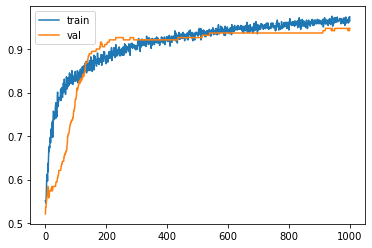

In [62]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_gyro_y.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)
# fit model
history = model_gyro_y.fit(X_train, y_train, batch_size =10000, validation_data=(X_val, y_val), epochs=1000, verbose=0, callbacks=[es, mc])
# evaluate the model
_, train_acc = model_gyro_y.evaluate(X_train, y_train, verbose=0)
_, val_acc = model_gyro_y.evaluate(X_val, y_val, verbose=0)
print('Train: %.3f, Validation: %.3f' % (train_acc, val_acc))

# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='val')
pyplot.legend()
pyplot.show()

In [63]:
# load the saved model
saved_model = load_model('best_gyro_y.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(X_train, y_train, verbose=0)
_, test_acc = saved_model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.972, Test: 0.884


In [64]:
get_output = K.function([model_gyro_y.layers[0].input],
                                  [model_gyro_y.layers[3].output])
layer_output_gyro_y = get_output([X_test])[0]

## Gyro in x direction ###

In [65]:
model_gyro_x.compile(loss = 'binary_crossentropy', optimizer = 'SGD', metrics = ['accuracy']) #"mean_squared_error"

In [66]:
df_gyro_x

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,x
0,0.014894,0.048936,0.029787,0.011702,0.151064,-0.200000,0.115957,0.077660,0.097872,-0.023404,...,-0.332979,-0.106383,0.359574,-0.524468,-0.542553,-0.329787,0.322340,-0.181915,-0.259574,0
1,-0.269149,0.124468,0.144681,-0.241489,-0.275532,0.172340,0.012766,-0.072340,-0.027660,0.006383,...,-0.392553,0.274468,0.085106,-0.328723,-0.002128,0.131915,-0.440426,0.313830,0.315957,0
2,0.563830,0.212766,0.722340,-1.163830,-0.360638,0.395745,0.151064,0.003191,-0.108511,0.217021,...,0.342553,0.160638,-0.107447,0.034043,-0.210638,-0.190426,0.080851,0.047872,0.475532,0
3,-0.434043,-0.607447,-0.032979,0.244681,-0.660638,-0.444681,0.344681,-0.617021,-0.447872,0.568085,...,0.740426,0.377660,-0.751064,-0.126596,1.667021,-1.362766,-0.448936,0.291489,0.008511,0
4,-0.200000,-0.103191,-0.205319,0.027660,0.500000,-0.095745,0.093617,-0.895745,0.209574,0.305319,...,0.170213,-0.177660,-0.192553,-0.020213,-0.173404,0.081915,0.071277,0.242553,0.051064,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,0.248936,0.018085,0.023404,0.208511,-0.034043,-0.112766,-0.178723,0.759574,0.165957,-0.319149,...,-1.107447,-0.639362,0.182979,-0.414894,-0.675532,-0.295745,-0.025532,-0.584043,-0.760638,1
944,0.002128,0.393617,-0.562766,-0.492553,-0.052128,-0.667021,-0.272340,0.187234,-0.850000,-0.496809,...,0.096809,0.038298,-0.014894,0.156383,-0.041489,0.308511,-0.017021,-0.286170,0.105319,1
945,-0.100000,0.122340,0.210638,0.120213,-0.830851,-0.582979,0.713830,0.840426,-1.300000,-0.661702,...,-0.069149,-0.169149,0.298936,-0.141489,0.128723,0.028723,-0.382979,0.204255,-0.208511,1
946,-0.348936,0.377660,0.081915,-0.374468,-0.336170,0.636170,-0.209574,-0.576596,0.472340,-0.339362,...,-0.651064,-0.343617,0.514894,0.309574,0.292553,0.355319,-0.851064,0.148936,1.528723,1


In [67]:
dataset = df_gyro_x.values

In [68]:
X = dataset[:,0:200].astype(float)
Y = dataset[:,200].astype(int)

In [69]:
X, y = shuffle(X, Y, random_state=1)

In [70]:
X_train = X[:568]
y_train = y[:568]

In [71]:
X_val = X[568:758]
y_val = y[568:758]

In [72]:
X_test = X[758:]
y_test = y[758:]

In [73]:
X_train  = np.array(X_train)
y_train = np.array(y_train)
X_val  = np.array(X_val)
y_val = np.array(y_val)
X_test  = np.array(X_test)
y_test = np.array(y_test)

In [74]:
print("Train: ", X_train.shape, y_train.shape)
print("Val: ", X_val.shape, y_val.shape)
print("Test: ", X_test.shape, y_test.shape)

Train:  (568, 200) (568,)
Val:  (190, 200) (190,)
Test:  (190, 200) (190,)


Epoch 00629: early stopping
Train: 0.968, Validation: 0.774


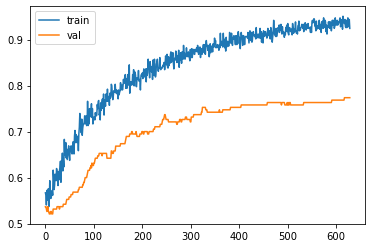

In [75]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_gyro_x.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)
# fit model
history = model_gyro_x.fit(X_train, y_train, batch_size =10000, validation_data=(X_val, y_val), epochs=1000, verbose=0, callbacks=[es, mc])
# evaluate the model
_, train_acc = model_gyro_x.evaluate(X_train, y_train, verbose=0)
_, val_acc = model_gyro_x.evaluate(X_val, y_val, verbose=0)
print('Train: %.3f, Validation: %.3f' % (train_acc, val_acc))

# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='val')
pyplot.legend()
pyplot.show()

In [76]:
# load the saved model
saved_model = load_model('best_gyro_x.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(X_train, y_train, verbose=0)
_, test_acc = saved_model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.968, Test: 0.732


In [77]:
get_output = K.function([model_gyro_x.layers[0].input],
                                  [model_gyro_x.layers[3].output])
layer_output_gyro_x = get_output([X_test])[0]

## Gyro in z direction ###

In [78]:
model_gyro_z.compile(loss = 'binary_crossentropy', optimizer = 'SGD', metrics = ['accuracy']) #"mean_squared_error"

In [79]:
df_gyro_z

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,z
0,0.556383,0.648936,0.722340,0.746809,0.742553,0.691489,0.630851,0.560638,0.542553,0.501064,...,-0.238298,-0.394681,-0.538298,-0.601064,-0.612766,-0.845745,-0.962766,-0.779787,-0.703191,0
1,-0.574468,-0.472340,-0.360638,-0.340426,-0.503191,-0.662766,-0.695745,-0.758511,-0.644681,-0.564894,...,0.965957,0.776596,0.614894,0.552128,0.425532,0.395745,0.400000,0.203191,0.090426,0
2,-0.137234,-0.262766,-0.903191,-0.795745,-0.737234,-0.579787,-0.455319,-0.470213,-0.202128,-0.009574,...,0.514894,0.414894,0.190426,-0.208511,-0.580851,-1.015957,-1.395745,-1.531915,-1.692553,0
3,-1.769149,-1.805319,-1.890426,-1.794681,-1.715957,-1.537234,-1.361702,-1.079787,-0.769149,-0.485106,...,0.915957,0.752128,0.601064,0.431915,0.145745,0.135106,-0.142553,-0.465957,-0.773404,0
4,-1.104255,-1.404255,-1.805319,-2.061702,-2.261702,-2.284043,-2.327660,-2.194681,-1.875532,-1.410638,...,-0.112766,0.106383,0.344681,0.384043,0.486170,0.360638,0.212766,-0.054255,-0.330851,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,1.052128,1.177660,1.217021,1.320213,1.374468,1.411702,1.458511,1.414894,1.520213,1.563830,...,1.453191,1.372340,1.230851,1.214894,1.236170,1.156383,1.108511,1.051064,1.038298,1
944,0.837234,0.628723,0.623404,0.567021,0.588298,0.747872,0.845745,0.734043,0.764894,0.677660,...,0.215957,0.161702,0.111702,-0.015957,-0.114894,-0.244681,-0.435106,-0.660638,-0.888298,1
945,-1.146809,-1.443617,-1.582979,-1.593617,-1.570213,-1.484043,-1.395745,-1.221277,-0.882979,-1.174468,...,0.926596,0.934043,0.834043,0.827660,0.722340,0.751064,0.682979,0.567021,0.545745,1
946,0.475532,0.260638,0.205319,0.162766,0.062766,-0.056383,0.004255,-0.044681,-0.050000,0.040426,...,0.854255,0.927660,0.973404,1.187234,1.406383,1.515957,1.526596,1.467021,1.263830,1


In [80]:
dataset = df_gyro_z.values

In [81]:
X = dataset[:,0:200].astype(float)
Y = dataset[:,200].astype(int)

In [82]:
X, y = shuffle(X, Y, random_state=1)

In [83]:
X_train = X[:568]
y_train = y[:568]

In [84]:
X_val = X[568:758]
y_val = y[568:758]

In [85]:
X_test = X[758:]
y_test = y[758:]

In [86]:
X_train  = np.array(X_train)
y_train = np.array(y_train)
X_val  = np.array(X_val)
y_val = np.array(y_val)
X_test  = np.array(X_test)
y_test = np.array(y_test)

In [87]:
print("Train: ", X_train.shape, y_train.shape)
print("Val: ", X_val.shape, y_val.shape)
print("Test: ", X_test.shape, y_test.shape)

Train:  (568, 200) (568,)
Val:  (190, 200) (190,)
Test:  (190, 200) (190,)


Epoch 00588: early stopping
Train: 0.926, Validation: 0.884


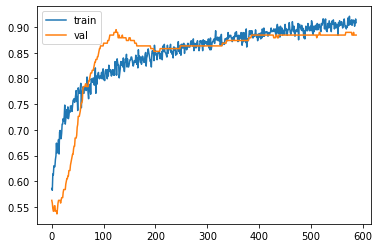

In [88]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_gyro_z.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)
# fit model
history = model_gyro_z.fit(X_train, y_train, batch_size =10000, validation_data=(X_val, y_val), epochs=1000, verbose=0, callbacks=[es, mc])
# evaluate the model
_, train_acc = model_gyro_z.evaluate(X_train, y_train, verbose=0)
_, val_acc = model_gyro_z.evaluate(X_val, y_val, verbose=0)
print('Train: %.3f, Validation: %.3f' % (train_acc, val_acc))

# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='val')
pyplot.legend()
pyplot.show()

In [89]:
# load the saved model
saved_model = load_model('best_gyro_z.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(X_train, y_train, verbose=0)
_, test_acc = saved_model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.840, Test: 0.821


In [90]:
get_output = K.function([model_gyro_z.layers[0].input],
                                  [model_gyro_z.layers[3].output])
layer_output_gyro_z = get_output([X_test])[0]

## Multivoting on output ##

In [96]:
kay = 0
kax = 0
kaz = 0

In [105]:
kgy = 0.8
kgx = 0.1
kgz = 0.1

In [106]:
true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0

for i in range(len(y_test)):
    temp = (kay*layer_output_acc_y[i][0]+kax*layer_output_acc_x[i][0]+kaz*layer_output_acc_z[i][0] + 
    kgy*layer_output_gyro_y[i][0]+kgx*layer_output_gyro_x[i][0]+kgz*layer_output_gyro_z[i][0])
    
    if temp <= 0.5: 
        temp = 0
    else:
        temp = 1
        
    if temp == 0 and y_test[i] == 0:
        true_negative += 1
    elif temp == 0 and y_test[i] == 1:
        false_positive += 1
    elif temp == 1 and y_test[i] == 1:
        true_positive += 1
    elif temp == 1 and y_test[i] == 0:
        false_negative += 1

In [107]:
accuracy = (true_negative+true_positive)/(true_negative+true_positive+false_negative+false_positive)

In [108]:
print(accuracy)

0.8894736842105263


In [110]:
precision = true_positive/(true_positive+false_positive)
print(precision)

0.8532110091743119


In [111]:
recall = true_positive/(true_positive+false_negative)
print(recall)

0.9489795918367347


In [113]:
f_1 = 2*((precision*recall)/(precision+recall))
print(f_1)

0.8985507246376812
